In [2]:
##Parameters for ticks in the plots
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True

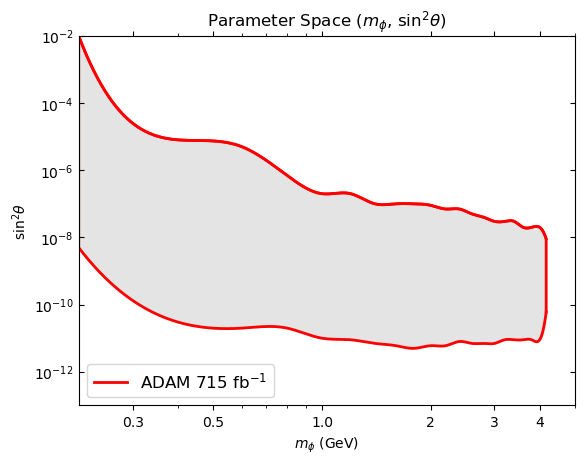

In [13]:
##Parameter Space plot for Dark Higgs bosons being produced from the B meson decays
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator, NullFormatter, FuncFormatter


# Data points
X = [0.212, 0.212, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.2, 1.2, 1.4, 1.4, 1.6, 1.6, 1.8, 1.8, 2.0, 2.0, 2.2, 2.2, 2.4, 2.4, 2.6, 2.6, 2.8, 2.8, 3.0, 3.0, 3.2, 3.2, 3.4, 3.4, 3.6, 3.6, 3.8, 3.8, 4.0, 4.0, 4.17, 4.17]
Y = [1e-2, 5e-9, 8e-6, 3e-11, 5e-6, 2e-11, 7e-7, 2e-11, 2e-7, 1e-11, 2e-7, 9e-12, 1e-7, 7e-12, 1e-7, 6e-12, 1e-7, 5e-12, 9e-8, 6e-12, 7e-8, 6e-12, 7e-8, 8e-12, 5e-8, 7e-12, 4e-8, 7e-12, 3e-8, 7e-12, 3e-8, 9e-12, 3e-8, 9e-12, 2e-8, 9e-12, 2e-8, 9e-12, 2e-8, 9e-12, 9e-9, 6e-11]

# Create a dictionary to remove duplicate X values while keeping the maximum and minimum Y values
data_dict = {}
for x, y in zip(X, Y):
    if x not in data_dict:
        data_dict[x] = [y, y]  # Initialize with y as both max and min
    else:
        data_dict[x][0] = max(y, data_dict[x][0])  # Update max y value
        data_dict[x][1] = min(y, data_dict[x][1])  # Update min y value

# Separate max and min Y values into different lists
X_unique = list(data_dict.keys())
Y_max = [data_dict[x][0] for x in X_unique]
Y_min = [data_dict[x][1] for x in X_unique]

# Calculate the logarithm of X and Y
X_log = np.log10(X_unique)
Y_max_log = np.log10(Y_max)
Y_min_log = np.log10(Y_min)

# Create a smooth spline curve through the log-transformed data for maximum Y values
spline_max = make_interp_spline(X_log, Y_max_log, k=3)
X_smooth_max = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_max = spline_max(X_smooth_max)

# Create a smooth spline curve through the log-transformed data for minimum Y values
spline_min = make_interp_spline(X_log, Y_min_log, k=3)
X_smooth_min = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_min = spline_min(X_smooth_min)

# Interpolate at the beginning points
X_smooth_max = np.insert(X_smooth_max, 0, X_smooth_min[0])
Y_smooth_max = np.insert(Y_smooth_max, 0, Y_smooth_min[0])

# Join the endpoints of the two curves
X_smooth_joined = np.concatenate((X_smooth_max, X_smooth_min[-1:]))
Y_smooth_joined = np.concatenate((Y_smooth_max, Y_smooth_min[-1:]))

# Plot the spline curves in red and green for maximum and minimum Y values
plt.loglog(10 ** X_smooth_max, 10 ** Y_smooth_max, 'r-', linewidth=2)
plt.loglog(10 ** X_smooth_min, 10 ** Y_smooth_min, 'r-', linewidth=2)

# Plot the joined curve in black
plt.loglog(10 ** X_smooth_joined, 10 ** Y_smooth_joined, 'r-', linewidth=2, label = r'ADAM 715 fb$^{-1}$')

# Ensure both arrays have the same length
X_smooth_joined = X_smooth_joined[:len(Y_smooth_joined)]
Y_smooth_min = Y_smooth_min[:len(X_smooth_joined)]

# Interpolate Y_smooth_min to match the length of X_smooth_joined
interp_func = interp1d(np.arange(len(Y_smooth_min)), Y_smooth_min)
Y_smooth_min_interpolated = interp_func(np.linspace(0, len(Y_smooth_min) - 1, len(X_smooth_joined)))

# Fill the area under the curve with a light gray color
plt.fill_between(10 ** X_smooth_joined, 10 ** Y_smooth_min_interpolated, 10 ** Y_smooth_joined, color='lightgray', alpha=0.6)

# Ticks for X-axis
major_x_ticks = [0.3, 0.5, 1.0, 2, 3, 4]

# Set the X-axis major ticks and labels
plt.xticks(major_x_ticks, [f'{tick}' for tick in major_x_ticks])

# Function to format Y-axis tick labels as 10^-X
def format_y_tick(value, _):
    if value == 1e-2:
        return r'$10^{-2}$'
    elif value == 1e-4:
        return r'$10^{-4}$'
    elif value == 1e-6:
        return r'$10^{-6}$'
    elif value == 1e-8:
        return r'$10^{-8}$'
    elif value == 1e-10:
        return r'$10^{-10}$'
    elif value == 1e-12:
        return r'$10^{-12}$'
    else:
        return ''

# Ticks for Y-axis
major_ticks = [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2]

# Set the Y-axis major ticks and labels
plt.yticks(major_ticks, [f'{tick:.0e}' for tick in major_ticks])
plt.yticks(major_ticks)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

#plt.text(0.8, 1e-10, r'$B\rightarrow K(\phi\rightarrow\mu\mu)$', fontsize=12, color='black')


# Set the X-axis limits
plt.xlim(0.212, 5.0)  # Set the limits to start from 0.212 and end at 4.17

# Set Y-axis limits to ensure it ends at 10^-3
plt.ylim(1e-13, 1e-2)

# Set labels and title
plt.xlabel(r'$m_{\phi}$ (GeV)')
plt.ylabel(r'$\sin^2\theta$')
plt.title('Parameter Space ($m_{\phi}$, $\sin^2\\theta$)')

# Show grid
plt.grid(False)

# Show the legend
plt.legend(loc='lower left', fontsize=12)




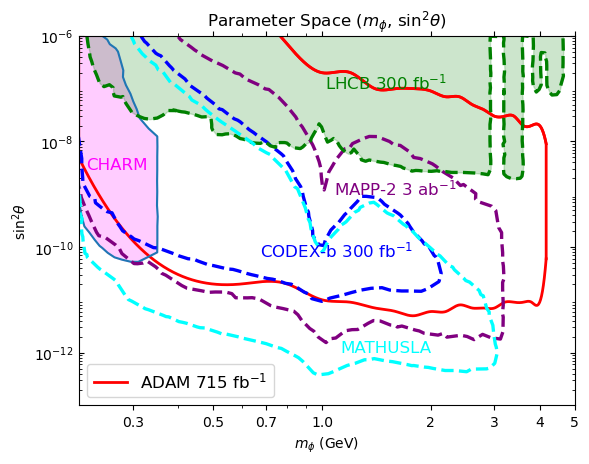

In [14]:
##Comparison of the parameter space with various other experiments
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator, NullFormatter, FuncFormatter


# Data points
X = [0.212, 0.212, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.2, 1.2, 1.4, 1.4, 1.6, 1.6, 1.8, 1.8, 2.0, 2.0, 2.2, 2.2, 2.4, 2.4, 2.6, 2.6, 2.8, 2.8, 3.0, 3.0, 3.2, 3.2, 3.4, 3.4, 3.6, 3.6, 3.8, 3.8, 4.0, 4.0, 4.17, 4.17]
Y = [1e-2, 5e-9, 8e-6, 3e-11, 5e-6, 2e-11, 7e-7, 2e-11, 2e-7, 1e-11, 2e-7, 9e-12, 1e-7, 7e-12, 1e-7, 6e-12, 1e-7, 5e-12, 9e-8, 6e-12, 7e-8, 6e-12, 7e-8, 8e-12, 5e-8, 7e-12, 4e-8, 7e-12, 3e-8, 7e-12, 3e-8, 9e-12, 3e-8, 9e-12, 2e-8, 9e-12, 2e-8, 9e-12, 2e-8, 9e-12, 9e-9, 6e-11]
# Create a dictionary to remove duplicate X values while keeping the maximum and minimum Y values
data_dict = {}
for x, y in zip(X, Y):
    if x not in data_dict:
        data_dict[x] = [y, y]  # Initialize with y as both max and min
    else:
        data_dict[x][0] = max(y, data_dict[x][0])  # Update max y value
        data_dict[x][1] = min(y, data_dict[x][1])  # Update min y value

# Separate max and min Y values into different lists
X_unique = list(data_dict.keys())
Y_max = [data_dict[x][0] for x in X_unique]
Y_min = [data_dict[x][1] for x in X_unique]

# Calculate the logarithm of X and Y
X_log = np.log10(X_unique)
Y_max_log = np.log10(Y_max)
Y_min_log = np.log10(Y_min)

# Create a smooth spline curve through the log-transformed data for maximum Y values
spline_max = make_interp_spline(X_log, Y_max_log, k=3)
X_smooth_max = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_max = spline_max(X_smooth_max)

# Create a smooth spline curve through the log-transformed data for minimum Y values
spline_min = make_interp_spline(X_log, Y_min_log, k=3)
X_smooth_min = np.linspace(min(X_log), max(X_log), 1000)
Y_smooth_min = spline_min(X_smooth_min)

# Interpolate at the beginning points
X_smooth_max = np.insert(X_smooth_max, 0, X_smooth_min[0])
Y_smooth_max = np.insert(Y_smooth_max, 0, Y_smooth_min[0])

# Join the endpoints of the two curves
X_smooth_joined = np.concatenate((X_smooth_max, X_smooth_min[-1:]))
Y_smooth_joined = np.concatenate((Y_smooth_max, Y_smooth_min[-1:]))

# Plot the spline curves in red and green for maximum and minimum Y values
plt.loglog(10 ** X_smooth_max, 10 ** Y_smooth_max, 'r-', linewidth=2)
plt.loglog(10 ** X_smooth_min, 10 ** Y_smooth_min, 'r-', linewidth=2)

# Plot the joined curve in black
plt.loglog(10 ** X_smooth_joined, 10 ** Y_smooth_joined, 'r-', linewidth=2, label = r'ADAM 715 fb$^{-1}$')




# Plotting the bounds for different experiments defined in the cell below


#plt.loglog(T1, T2)
#plt.loglog(K1, K2)
#plt.fill_between(K1, K2, K2.max(), color='green', alpha=0.2)
plt.loglog(L1, L2)
plt.fill_between(L1, L2, L2.max(), color='magenta', alpha=0.2)

# Add a label inside the plot region for CHARM
label_x = 0.27  # X-coordinate for the label
label_y = 3e-9  # Y-coordinate for the label
plt.text(label_x, label_y, 'CHARM', fontsize=12, color='magenta', ha='center')

# Add a label inside the plot region for MAPP-1 300 fb^-1
#plt.loglog(M1, M2, linestyle='--', color = 'grey',linewidth = 2.4)
label_x = 1.51  # X-coordinate for the label
label_y = 1.1e-9  # Y-coordinate for the label
label_text_3 = r'MAPP-1 300 fb$^{-1}$'
#plt.text(label_x, label_y, label_text_3, fontsize=9, color='grey', ha='center')


# Add a label inside the plot region for MAPP-2 3 ab^-1
plt.loglog(N1, N2, linestyle='--', color = 'Purple', linewidth = 2.4)
label_x = 1.6  # X-coordinate for the label
label_y = 1e-9  # Y-coordinate for the label
label_text_4 = r'MAPP-2 3 ab$^{-1}$'
plt.text(label_x, label_y, label_text_4, fontsize=12, color='Purple', ha='center')

# Add a label inside the plot region for Codex-b
label_x = 1.1  # X-coordinate for the label
label_y = 6.5e-11  # Y-coordinate for the label
label_text_1 = r'CODEX-b 300 fb$^{-1}$'
plt.text(label_x, label_y, label_text_1, fontsize=12, color='blue', ha='center')
plt.loglog(O1, O2, linestyle='--', color = 'blue', linewidth = 2.4)

# Add a label inside the plot region for LHCB
label_x = 1.5  # X-coordinate for the label
label_y = 1e-7  # Y-coordinate for the label
label_text_2 = r'LHCB 300 fb$^{-1}$'
plt.text(label_x, label_y, label_text_2, fontsize=12, color='green', ha='center')
plt.loglog(P1, P2, linestyle='--', color= 'green',linewidth = 2.4)
plt.fill_between(P1, P2, P2.max(), color='green', alpha=0.2)

# Add a label inside the plot region for MATHUSLA
label_x = 1.5  # X-coordinate for the label
label_y = 1e-12  # Y-coordinate for the label
plt.text(label_x, label_y,'MATHUSLA', fontsize=12, color='cyan', ha='center')
plt.loglog(Q1, Q2, linestyle='--', color = 'cyan', linewidth = 2.4)

#Add a label inside the plot region for SHIP
label_x = 3.5  # X-coordinate for the label
label_y = 4.5e-12  # Y-coordinate for the label
#plt.text(label_x, label_y,'SHIP', fontsize=10, color='brown', ha='center')
#plt.loglog(R1, R2, linestyle='--', color = 'brown', linewidth = 2.4)

# Ticks for X-axis
major_x_ticks = [0.3, 0.5, 0.7, 1.0, 2, 3, 4, 5]

# Set the X-axis major ticks and labels
plt.xticks(major_x_ticks, [f'{tick}' for tick in major_x_ticks])

# Function to format Y-axis tick labels as 10^-X
def format_y_tick(value, _):
    if value == 1e-6:
        return r'$10^{-6}$'
    elif value == 1e-8:
        return r'$10^{-8}$'
    elif value == 1e-10:
        return r'$10^{-10}$'
    elif value == 1e-12:
        return r'$10^{-12}$'
    else:
        return ''

# Ticks for Y-axis
major_ticks = [1e-12, 1e-10, 1e-8, 1e-6]

# Set the Y-axis major ticks and labels
plt.yticks(major_ticks, [f'{tick:.0e}' for tick in major_ticks])
plt.yticks(major_ticks)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))


# Set the X-axis limits
plt.xlim(0.212, 5.0)  # Set the limits to start from 0.212 and end at 4.17

# Set Y-axis limits to ensure it ends at 10^-3
plt.ylim(1e-13, 1e-6)

# Set labels and title
plt.xlabel(r'$m_{\phi}$ (GeV)')
plt.ylabel(r'$\sin^2\theta$')
plt.title('Parameter Space ($m_{\phi}$, $\sin^2\\theta$)')

# Show grid
plt.grid(False)

# Show the legend
plt.legend(loc='lower left', fontsize=12)




In [12]:
## Excel file import for data points from various other experiments
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import Pandas
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import LogLocator, ScalarFormatter

#file path 
file_path1 = "/Users/rishaplamichhane/Documents/Research Materials/MAPP-1_30 fb_data points.xls"
file_path2 = "/Users/rishaplamichhane/Documents/Research Materials/LHCB_3fb_data points.xls"
file_path3 = "/Users/rishaplamichhane/Documents/Research Materials/Charm_points.xls"
file_path4 = "/Users/rishaplamichhane/Documents/Research Materials/MAPP-1_300 fb_points.xls"
file_path5 = "/Users/rishaplamichhane/Documents/Research Materials/MAPP-2_3ab_points.xls"
file_path6 = "/Users/rishaplamichhane/Documents/Research Materials/Codex-b_300fb_points.xls"
file_path7 = "/Users/rishaplamichhane/Documents/Research Materials/LHCB_300fb_points.xls"
file_path8 = "/Users/rishaplamichhane/Documents/Research Materials/Mathusla_recast_codexb_paper.xls"
file_path9 = "/Users/rishaplamichhane/Documents/Research Materials/SHIP_scalarhiggs_case_points.xls"


# Read data from XLS file
data1 = pd.read_excel(file_path1)  
data2 = pd.read_excel(file_path2)  
data3 = pd.read_excel(file_path3)
data4 = pd.read_excel(file_path4) 
data5 = pd.read_excel(file_path5) 
data6 = pd.read_excel(file_path6) 
data7 = pd.read_excel(file_path7) 
data8 = pd.read_excel(file_path8) 
data9 = pd.read_excel(file_path9) 


# Extract 'x' and 'y' columns from the data MAPP-1 (30 fb ^-1)
T1 = data1['x']
T2 = data1['y']


# Extract 'x' and 'y' columns from the data LHCB (3fb^-1)
K1 = data2['x']
K2 = data2['y']

# Extract 'x' and 'y' columns from the data CHARM
L1 = data3['x']
L2 = data3['y']

# Extract 'x' and 'y' columns from the data MAPP-1 (300 fb ^ -1)
M1 = data4['x']
M2 = data4['y']

# Extract 'x' and 'y' columns from the data MAPP-2 (3 ab ^ -1)
N1 = data5['x']
N2 = data5['y']

# Extract 'x' and 'y' columns from the data Codex-b(300 fb ^ -1)
O1 = data6['x']
O2 = data6['y']

# Extract 'x' and 'y' columns from the data LHCB (300 fb ^ -1)
P1 = data7['x']
P2 = data7['y']

# Extract 'x' and 'y' columns from the data MATHUSLA
Q1 = data8['x']
Q2 = data8['y']

# Extract 'x' and 'y' columns from the data MATHUSLA
R1 = data9['x']
R2 = data9['y']

